## Usage for personal genres data

Change variable user for the Letterboxd username. Then use the function ger_user_fav_genres(user, save=True) to get the data, use save=True to store the data into JSON files to prevent scraping again.

In [1]:
import fg_scraper

user = 'fer_nwn'

In [2]:
fav_gens = fg_scraper.get_user_fav_genres(user, save=True)

## Scrape your friends and get their personal tastes

In [2]:
friends = fg_scraper.get_friends_fav_genres(user, save=True)

In [3]:
print(friends)

{'toruuu': {}, 'fumilayo': {'adventure': 9, 'science-fiction': 6, 'history': 5, 'drama': 34, 'horror': 8, 'action': 4, 'animation': 7, 'comedy': 34, 'fantasy': 8, 'mystery': 8, 'crime': 6, 'thriller': 6, 'documentary': 5, 'music': 3, 'romance': 10, 'family': 2, 'western': 1}, 'mubius': {'documentary': 15, 'drama': 48, 'comedy': 16, 'romance': 9, 'crime': 4, 'thriller': 7, 'mystery': 6, 'fantasy': 3, 'music': 6, 'history': 2, 'action': 1, 'animation': 3, 'horror': 4, 'western': 1, 'science-fiction': 1}, 'lgoled': {'romance': 8, 'science-fiction': 21, 'comedy': 7, 'documentary': 1, 'action': 18, 'adventure': 10, 'music': 1, 'drama': 33, 'animation': 7, 'mystery': 10, 'thriller': 32, 'crime': 19, 'western': 3, 'history': 4, 'war': 1, 'horror': 5, 'fantasy': 3, 'family': 2}, 'pulie': {'fantasy': 4, 'family': 6, 'animation': 8, 'romance': 2, 'science-fiction': 4, 'comedy': 5, 'drama': 2, 'history': 1, 'adventure': 4, 'action': 4, 'music': 1}, 'asansores16': {'comedy': 23, 'animation': 14, '

## Basic ploting for personal genres

In [16]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Function to load JSON data
def load_data(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# Convert the dict of dicts to a DataFrame
def dict_to_dataframe(data):
    df = pd.DataFrame(data).fillna(0)
    return df.T

# Perform clustering and plot the results
def cluster_and_plot(df):
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Add cluster labels to the DataFrame
    df['Cluster'] = clusters
    
    # Perform PCA for visualization
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(scaled_data)
    
    # Create a DataFrame for the PCA components
    pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
    pca_df['Cluster'] = clusters
    pca_df['User'] = df.index
    
    # Plot the PCA components with cluster coloring
    plt.figure(figsize=(20, 16))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=1000)
    for i in range(pca_df.shape[0]):
        plt.text(pca_df['PC1'][i], pca_df['PC2'][i], pca_df['User'][i], fontsize=16)
    plt.title('PCA of User Liked Genres')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()





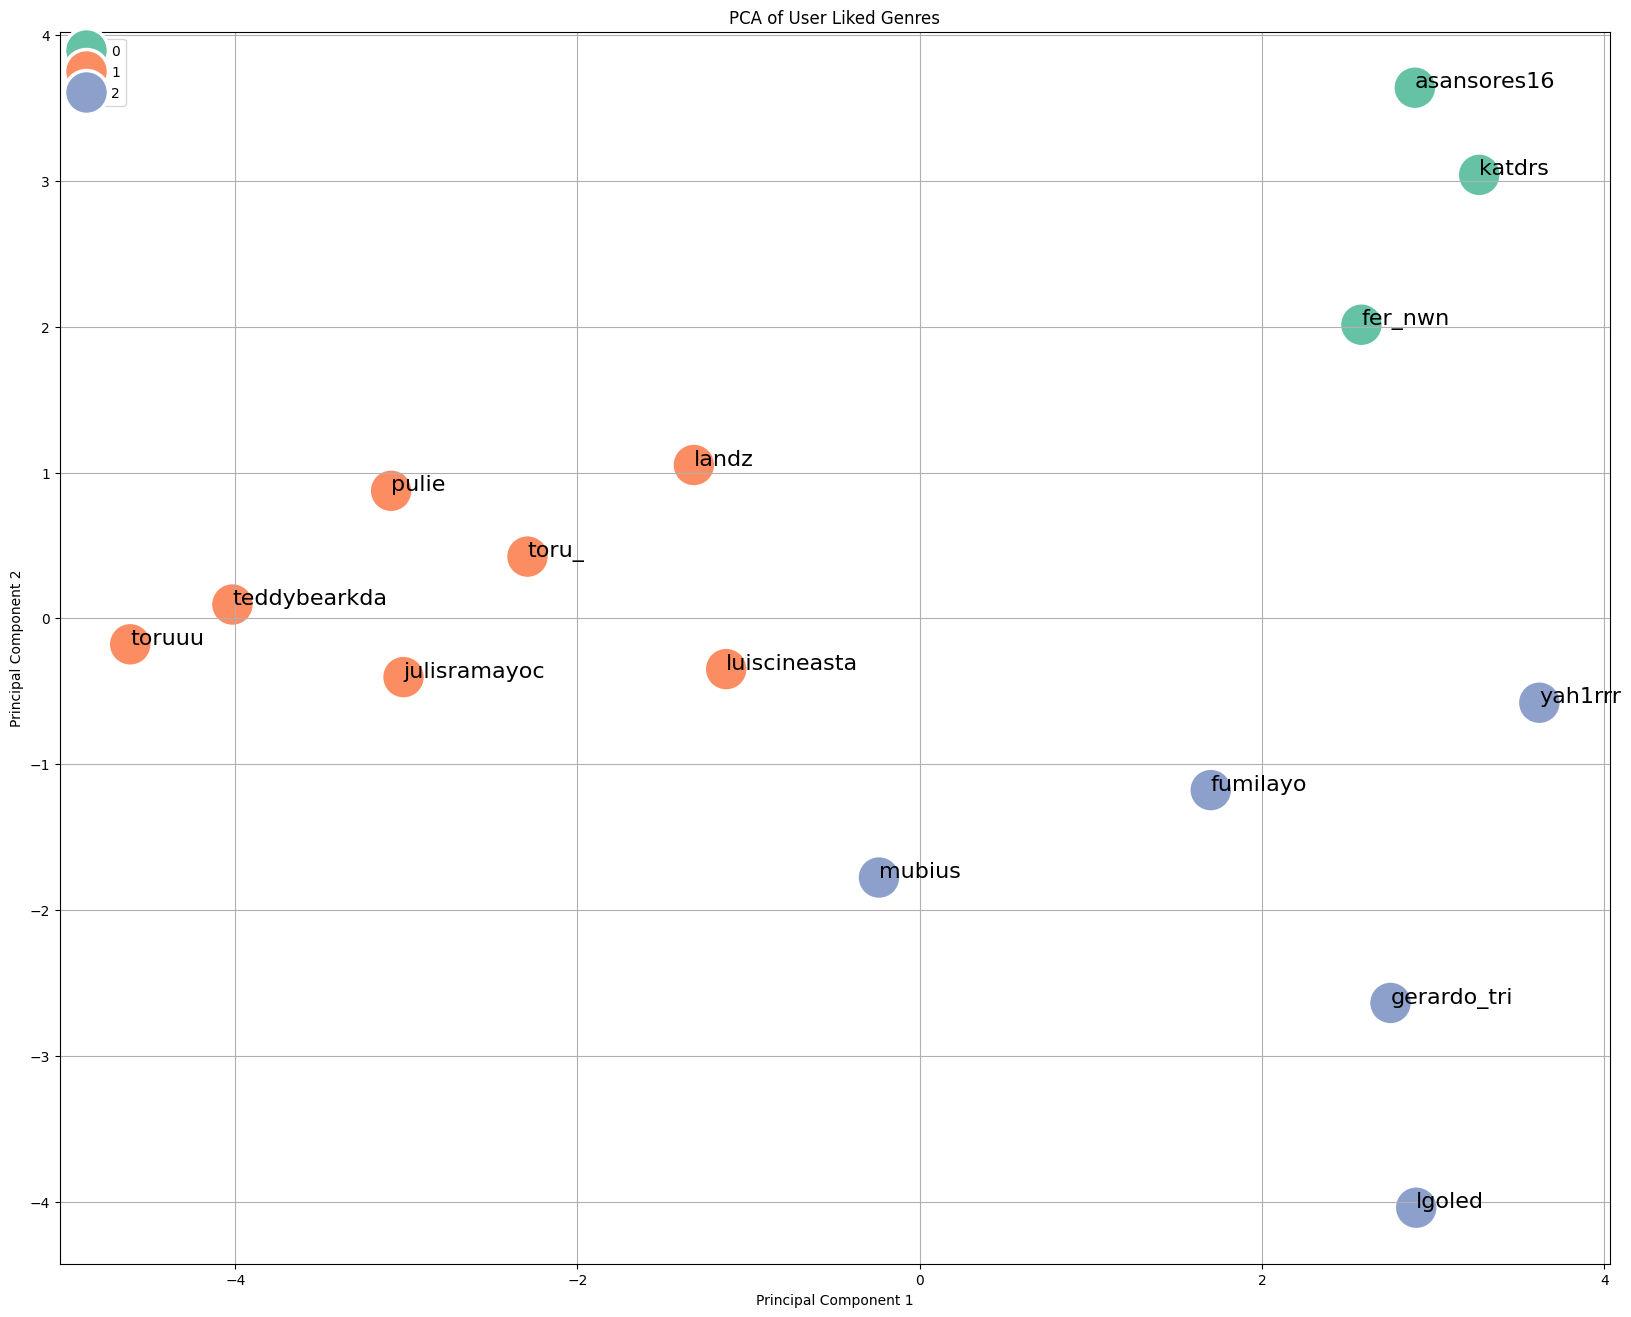

In [20]:
file_path = 'fer_nwn_friends_fav_genres.json'
data = load_data(file_path)
# add user data
userdata = 'fer_nwn_fav_genres.json'
data[user] = load_data(userdata)
df = dict_to_dataframe(data)
cluster_and_plot(df)

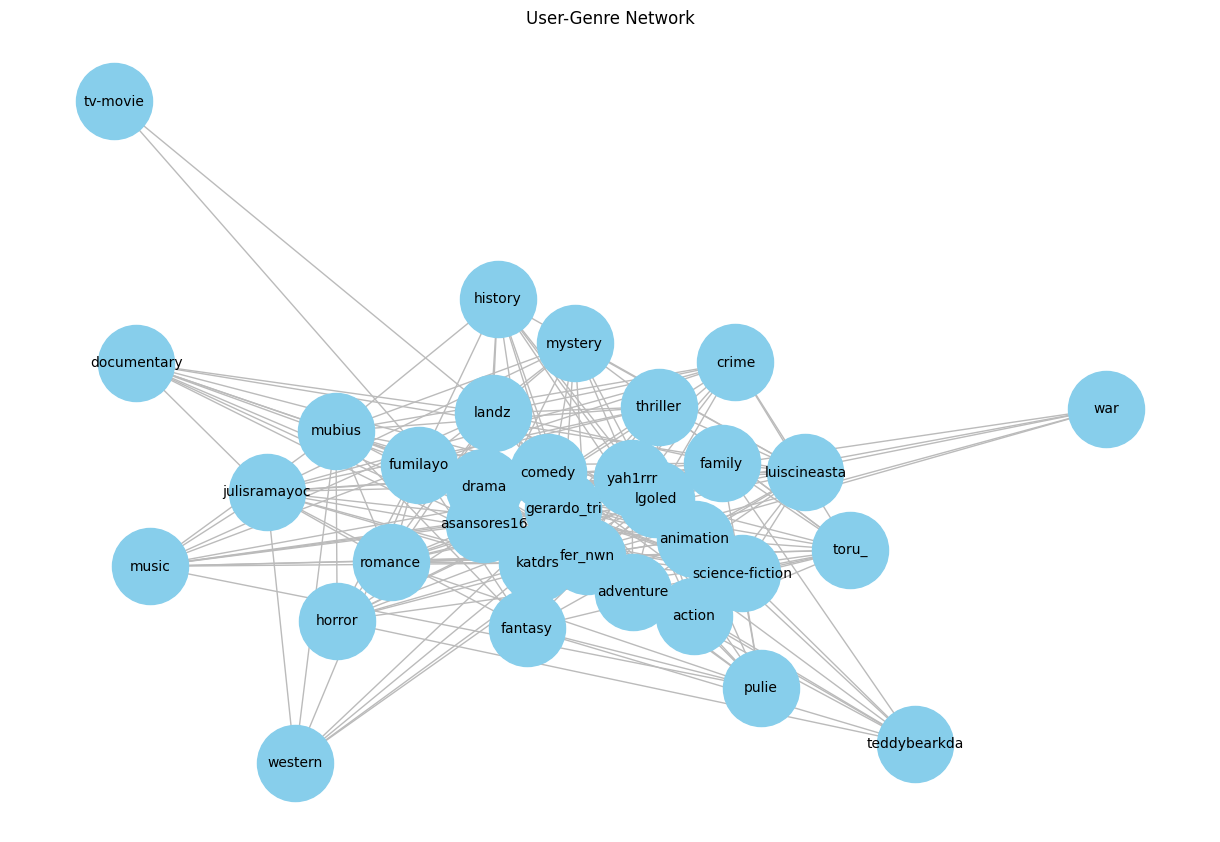

In [21]:
import networkx as nx

def user_genre_network(df):
    G = nx.Graph()
    
    # Add nodes and edges
    for user in df.index:
        for genre in df.columns[:-1]:  # Exclude 'Cluster'
            if df.at[user, genre] > 0:
                G.add_edge(user, genre, weight=df.at[user, genre])
    
    # Draw the network
    pos = nx.spring_layout(G, k=0.3)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, edge_color='#BBBBBB', font_size=10)
    plt.title('User-Genre Network')
    plt.show()


user_genre_network(df)


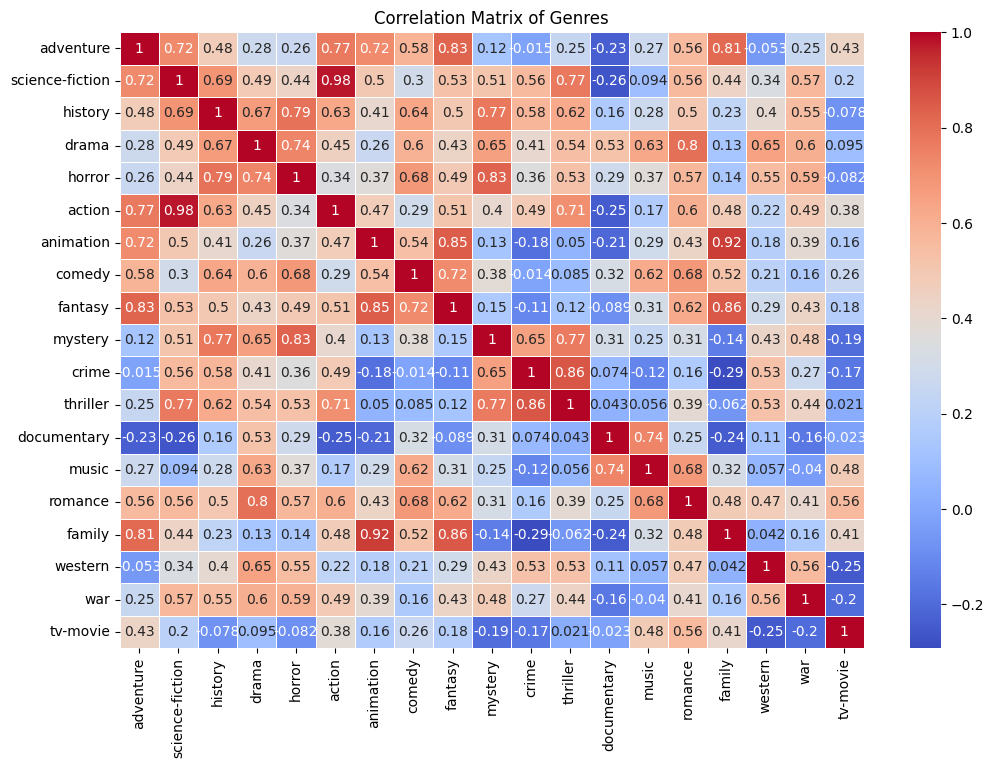

In [22]:
def genre_correlation(df):
    # Compute the correlation matrix
    corr = df.drop('Cluster', axis=1).corr()
    
    # Generate a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Genres')
    plt.show()

genre_correlation(df)


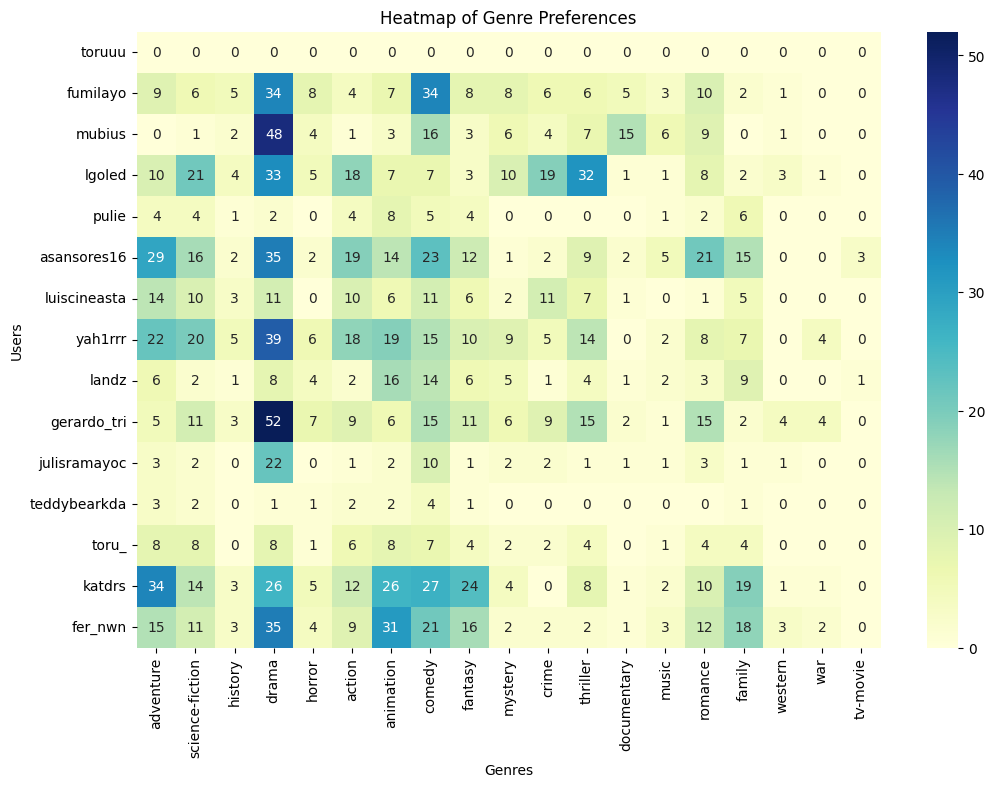

In [25]:
def genre_heatmap(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.drop('Cluster', axis=1), cmap='YlGnBu', annot=True)
    plt.title('Heatmap of Genre Preferences')
    plt.xlabel('Genres')
    plt.ylabel('Users')
    plt.show()

genre_heatmap(df)


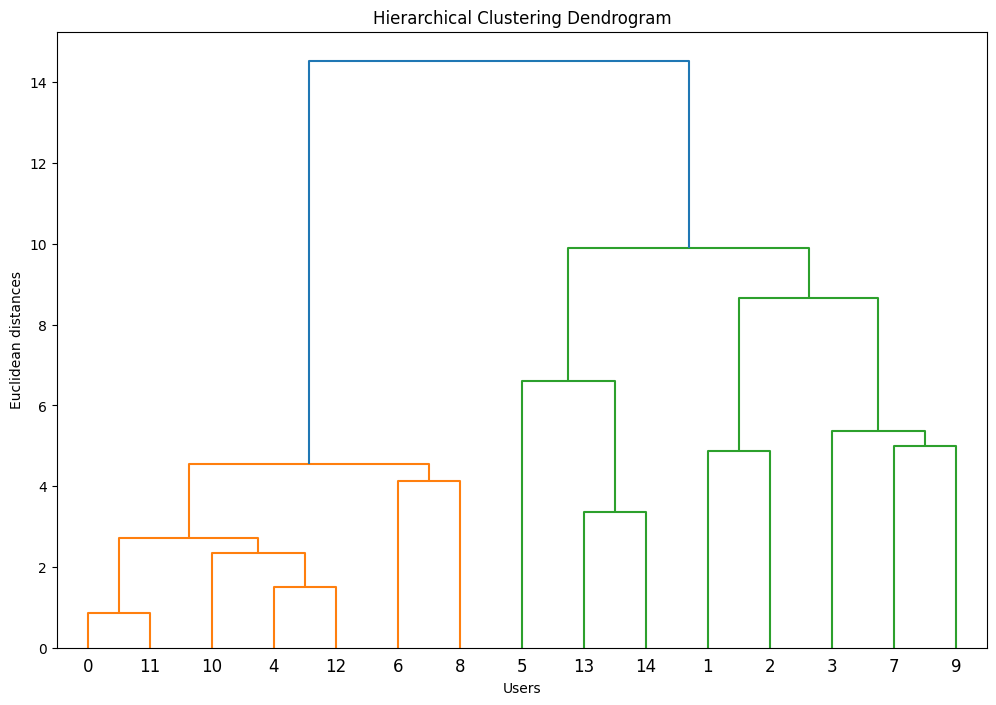

In [26]:
import scipy.cluster.hierarchy as sch

def hierarchical_clustering(df):
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df.drop('Cluster', axis=1))
    
    # Perform hierarchical clustering
    plt.figure(figsize=(12, 8))
    dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Users')
    plt.ylabel('Euclidean distances')
    plt.show()

hierarchical_clustering(df)
